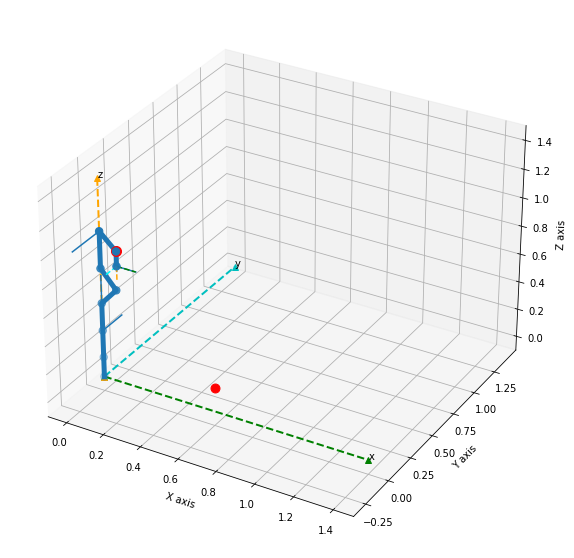

Len of links = 9
[Link name=Base link bounds=(None, None), Link name=joint_1 bounds=(-2.8973, 2.8973), Link name=joint_2 bounds=(-1.7628, 1.7628), Link name=joint_3 bounds=(-2.8973, 2.8973), Link name=joint_4 bounds=(-3.0718, -0.0698), Link name=joint_5 bounds=(-2.8973, 2.8973), Link name=joint_6 bounds=(-0.0175, 3.7525), Link name=joint_7n8 bounds=(-2.8973, 2.8973), Link name=joint_finger_center bounds=(None, None)]


In [1]:
import ikpy
from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink
import numpy as np
import ikpy.utils.plot as plot_utils
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from IPython.display import clear_output
class PandaEnv():
    def __init__(self):
        
        self.my_chain = Chain.from_urdf_file("./panda_with_bound.URDF")
        self.my_chain_ = Chain.from_urdf_file("./panda_with_bound_nofinger_center.URDF")
        self.state = [0]*10
        self.motorPosList =[0]*7
#         self.target_position = [0]*3
        TargetList = [[0.5, 0, 0], [0.4, 0, 0], [0.6, 0, 0], [0.4, 0.2, 0], [0.5, 0.2, 0], [0.6, 0.2, 0], [0.4, -0.2, 0], [0.5, -0.2, 0], [0.6, -0.2, 0]]
        self.target_position = np.array(TargetList[random.randint(0, 8)])
        self.show(showPanda=True, target=self.target_position)
        
    def show_my_chain_links(self):
        print("Len of links =", len(self.my_chain.links))
        print(self.my_chain.links)
        
    def reset(self): 
        self.motorPosList =[0]*7
#         self.target_position = np.random.randn(3)
#         self.target_position = self.target_position/np.linalg.norm(self.target_position)/2

        TargetList = [[0.5, 0, 0], [0.4, 0, 0], [0.6, 0, 0], [0.4, 0.2, 0], [0.5, 0.2, 0], [0.6, 0.2, 0], [0.4, -0.2, 0], [0.5, -0.2, 0], [0.6, -0.2, 0]]
        self.target_position = np.array(TargetList[random.randint(0, 8)])
        self.state = self.target_position.tolist() + self.motorPosList
        return self.state
    
    def show(self, showPanda=True, target=[0]*3, joints=[0]*9):
#         print("target =",target)
        clear_output(True)
        fig = plt.figure(figsize = (10, 10))
        ax = plt.gca(projection='3d')
        axis_len = 1.4
        ax.plot([0, axis_len], [0, 0],[0, 0], color='g', marker='^', linestyle='dashed', linewidth=2)
        ax.plot([0, 0], [0, axis_len],[0, 0], color='c', marker='^', linestyle='dashed', linewidth=2)
        ax.plot([0, 0], [0, 0],[0, axis_len], color='orange', marker='^', linestyle='dashed', linewidth=2)
        ax.text(axis_len,0,0,'x')
        ax.text(0,axis_len,0,'y')
        ax.text(0,0,axis_len,'z')
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        if(showPanda):
            self.my_chain.plot(joints=joints, ax=ax, target=target)
            '''
            Param:
            joints (list) – The list of the positions of each joint
            ax (matplotlib.axes.Axes) – A matplotlib axes
            target (numpy.array) – An optional target
            show (bool) – Display the axe. Defaults to False
            '''
        joint6Pos = self.my_chain_.forward_kinematics(joints[0:8],full_kinematics=False)[:3,3]
        ax.scatter(joint6Pos[0], joint6Pos[1], joint6Pos[2], c='r', s=100, marker='o')
        plt.show()
        
#         plt.clf()
    def step_eval(self, action):
        self.motorPosList = [action[i] + self.motorPosList[i] for i in range(len(action))]
        self.motorPosList[0] = np.clip(self.motorPosList[0], -2.8973, 2.8973)
        self.motorPosList[1] = np.clip(self.motorPosList[1], -1.7628, 1.7628)
        self.motorPosList[2] = np.clip(self.motorPosList[2], -2.8973, 2.8973)
        self.motorPosList[3] = np.clip(self.motorPosList[3], -3.0718, -0.0698)
        self.motorPosList[4] = np.clip(self.motorPosList[4], -2.8973, 2.8973)
        self.motorPosList[5] = np.clip(self.motorPosList[5], -0.0175, 3.7525)
        self.motorPosList[6] = np.clip(self.motorPosList[6], -2.8973, 2.8973)
        
        new_state = self.target_position.tolist() + self.motorPosList
        self.show(showPanda="True", target=self.target_position, joints=[0]+self.motorPosList+[0])
        endPointPos = self.my_chain.forward_kinematics([0]+self.motorPosList+[0],full_kinematics=False)[:3, 3]
        distance = np.linalg.norm(endPointPos-self.target_position)
        reward = -distance
        if distance < 0.03: 
            reward += 0.5
        elif distance < 0.015: 
            reward += 1.5
        if(distance < 0.01):
            done = True 
        else:
            done = False
        info = "nothing"
        self.state = new_state
        return new_state, reward, done, info
    
    def step(self, action)->tuple:
        self.motorPosList = [action[i] + self.motorPosList[i] for i in range(len(action))]
        self.motorPosList[0] = np.clip(self.motorPosList[0], -2.8973, 2.8973)
        self.motorPosList[1] = np.clip(self.motorPosList[1], -1.7628, 1.7628)
        self.motorPosList[2] = np.clip(self.motorPosList[2], -2.8973, 2.8973)
        self.motorPosList[3] = np.clip(self.motorPosList[3], -3.0718, -0.0698)
        self.motorPosList[4] = np.clip(self.motorPosList[4], -2.8973, 2.8973)
        self.motorPosList[5] = np.clip(self.motorPosList[5], -0.0175, 3.7525)
        self.motorPosList[6] = np.clip(self.motorPosList[6], -2.8973, 2.8973)
        
        new_state = self.target_position.tolist() + self.motorPosList
        tmp = self.my_chain.forward_kinematics([0]+self.motorPosList+[0],full_kinematics=False)
        R_matrix = tmp[0:3, 0:3]
        endPointPos = tmp[:3, 3]
        distance = np.linalg.norm(endPointPos-self.target_position)
        reward = -distance
#         print("reward(distance):", reward)
        reward = reward + ((R_matrix[0,2]-1) + ((-1)-R_matrix[1,1]) + (R_matrix[2,0]-1))*0.2
#         print("reward(R_matrix):", ((R_matrix[0,2]-1) + ((-1)-R_matrix[1,1]) + (R_matrix[2,0]-1))*0.2)
        done = False
        if distance < 0.01: 
            reward += 2
            done = True
        elif distance < 0.015: 
            reward += 1.5
        elif(distance < 0.03):
            reward += 0.5
        else:
            done = False
        info = "nothing"
        self.state = new_state
        
        return new_state, reward, done, info
env = PandaEnv()
env.show_my_chain_links()

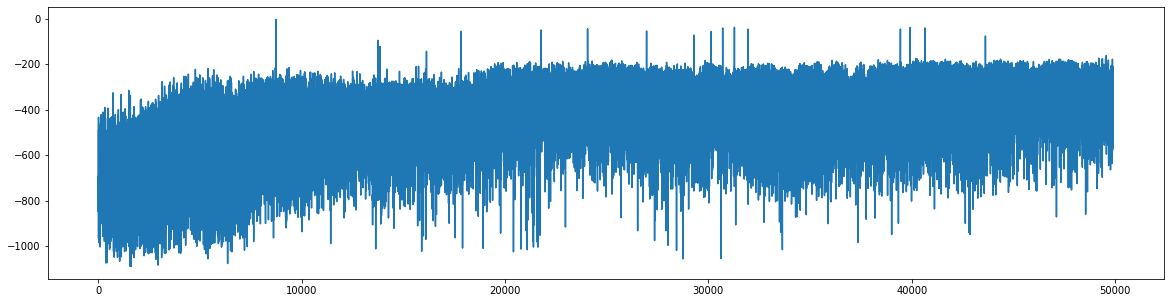

100%|█████████▉| 49901/50000 [6:40:46<00:38,  2.55it/s]

... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...


100%|██████████| 50000/50000 [6:41:18<00:00,  2.08it/s]


In [4]:
from ddpg_pytorch_dir2 import Agent
import numpy as np
from tqdm import tqdm

from IPython.display import clear_output
def plot(scores):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.plot(scores)
        plt.show()

env = PandaEnv()
agent = Agent(alpha=0.000025, beta=0.00025, input_dims=[10], tau=0.001, 
              batch_size=64,  layer1_size=400, layer2_size=400, n_actions=7)

#agent.load_models()
np.random.seed(0)

score_history = []

step_cnt = 0
for i in tqdm(range(50000)):
#     agent.save_models() # save models-----------------------
    obs = env.reset()
    done = False
    score = 0
    while not done:
        step_cnt = step_cnt + 1
        if(step_cnt>500):
            step_cnt=0
            break
        act = agent.choose_action(obs)
        new_state, reward, done, info = env.step(act*0.032)
        agent.remember(obs, act, reward, new_state, int(done))
        
        score += reward
        obs = new_state
        #env.render()
    agent.learn()
    score_history.append(score)
    
    #if i % 25 == 0:
    #    agent.save_models()

#     print('episode ', i, 'score %.2f' % score,
#           'trailing 100 games avg %.3f' % np.mean(score_history[-100:]))
    if(i%100==0):
        plot(score_history)
        agent.save_models()
# plotLearning(score_history, filename, window=100)

... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...
... saving checkpoint ...


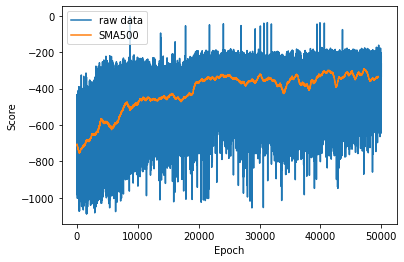

In [5]:
plt.plot(range(len(score_history)),score_history , label="raw data")

SMA50 = []
cnt = 0
for i in range(len(score_history)-500):
    cnt = 0
    for j in range(500):
        cnt = cnt + score_history[i+j]
    SMA50.append(cnt/500)
plt.plot(range(len(SMA50)),SMA50 , label="SMA500")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
agent.save_models()

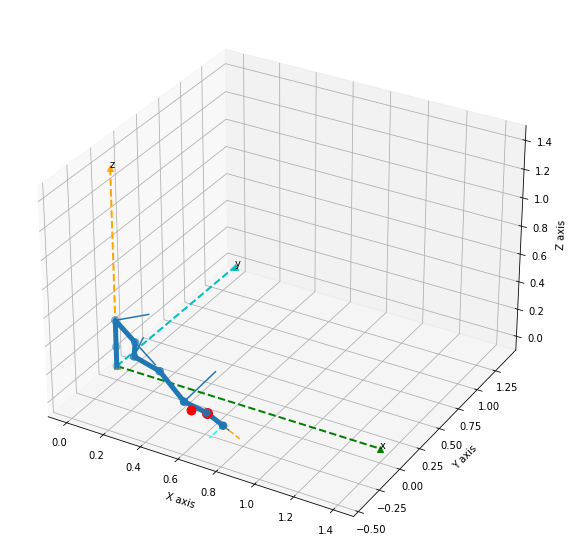

In [4]:
import time
time.sleep(5)
obs = env.reset()
done = False
# score = 0
from ddpg_pytorch_dir2 import Agent
agent = Agent(alpha=0.000025, beta=0.00025, input_dims=[10], tau=0.001, 
              batch_size=64,  layer1_size=400, layer2_size=400, n_actions=7)
agent.load_models()
step_cnt = 0
while not done:
    step_cnt = step_cnt + 1
    if(step_cnt>300):
        step_cnt=0
        break
    act = agent.choose_action(obs)
    new_state, reward, done, info = env.step_eval(act*0.032)
        
#     score += reward
    obs = new_state